In [1]:
#logistic regression
#knn
#naive Bayes

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
processed_df=pd.read_csv(r"C:\Users\Mrityunjay\Data Science Naresh it\Class notes by me\Machaine _learning\ml_development\preprocessd_data.csv")
processed_df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,-0.944404,-1.403000,-0.415473,0
1,0,0.029654,1.235009,0,0,0.304821,-0.901748,-0.688523,-0.599124,0.347522,0
2,0,2.580235,0.658246,0,0,-2.266627,0.613991,-0.483818,-1.403000,2.636507,1
3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,0.079121,-0.197185,1.110517,0
4,0,0.127754,2.288228,0,0,-0.333851,0.253101,-0.893228,1.008630,-0.415473,0
...,...,...,...,...,...,...,...,...,...,...,...
3401,1,-0.805656,0.479710,0,0,0.887802,0.552184,0.865765,-0.495634,-0.415473,1
3402,0,0.477826,0.674425,0,0,2.038061,-0.931071,0.567257,2.100185,0.235227,1
3403,0,-0.550521,0.426099,0,1,-0.410669,0.344847,-0.729485,-0.403904,1.873512,1
3404,0,0.004651,-0.444637,0,0,1.359751,-0.847121,-0.715010,-0.197185,-1.178468,1


$$Logistic Regression with  Hyperparameter Tuning$$

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Time in running: -0.13042974472045898
[1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0
 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0
 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0
 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1
 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0
 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0
 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 1 0

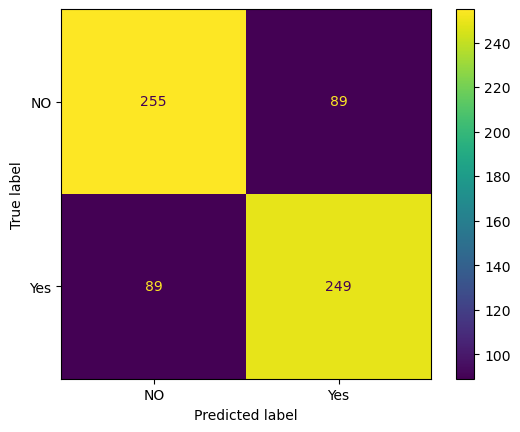

[[0.15120688 0.84879312]
 [0.65453135 0.34546865]
 [0.28920722 0.71079278]
 ...
 [0.52270354 0.47729646]
 [0.78440548 0.21559452]
 [0.2959673  0.7040327 ]]


NameError: name 'best_model' is not defined

In [16]:
X=processed_df.drop("churn",axis=1)
y=processed_df["churn"]
#======================================================
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
#=======================================================
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model
#=======================================================
params=lr_model.get_params()
print(params)
#=======================================================
params_grid={'C':[1.0],
             'class_weight':[None],                          #how to choose params and how to define????
             'dual':[False],
             'fit_intercept':[True],
             'intercept_scaling':[1],
             'l1_ratio':[None],
             'max_iter':[100],
             'multi_class': ['auto'],
             'n_jobs': [None],
             'penalty': ['l2'],
             'random_state': [None],
             'solver': ['lbfgs'],
             'tol': [0.0001],
             'verbose': [0],
             'warm_start': [False]}
#===========================================================
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_search=GridSearchCV(lr_model,
                        params_grid,cv=5,scoring="accuracy",verbose=True)
grid_search
#============================================================

import time 
start=time.time()
grid_search.fit(x_train,y_train)
end=time.time()
print("Time in running:",start-end)
#============================================================
lr_best_model=grid_search.best_estimator_
y_prediction=lr_best_model.predict(x_test)
print(y_prediction)
#============================================================
from sklearn.metrics import accuracy_score,recall_score,precision_score,\
                            f1_score,confusion_matrix,classification_report,\
                            ConfusionMatrixDisplay,roc_auc_score,roc_curve,auc

accuracy=round(accuracy_score(y_test,y_prediction),2)
print("Accuracy:",accuracy)
precision=round(precision_score(y_test,y_prediction),2)
print("Precision:",precision)
recall=round(recall_score(y_test,y_prediction),2)
print("Recall:",recall)
f1_score=round(f1_score(y_test,y_prediction),2)
print("F1_score:",f1_score)
#====================================================================
report=classification_report(y_test,y_prediction)
print(report)
cmt=confusion_matrix(y_test,y_prediction)
display=ConfusionMatrixDisplay(cmt,display_labels=["NO","Yes"])
display.plot()
plt.show()
#=======================================================================
y_pred_prob=lr_best_model.predict_proba(x_test)
print(y_pred_prob)
#=======================================================================
y_pred_yes=best_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_yes)
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-model")
plt.plot(fpr,tpr,color="darkorange",lw=2,label="Logistic Model")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC CURVE")
plt.show()
#==========================================================================
auc_score=round(auc(fpr,tpr),2)
print("Auc_score:",auc_score)

$$Naive Bayes With Hyperparameter Tuning$$

In [ ]:
X=processed_df.drop("churn",axis=1)
y=processed_df["churn"]
#======================================================
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)
#=======================================================
from sklearn.naive_bayes import GaussianNB
lr_model=GaussianNB()
lr_model
#=======================================================
params=lr_model.get_params()
print(params)
#=======================================================
params_grid={'priors': [None], 'var_smoothing': [1e-09]}
#===========================================================
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_search=GridSearchCV(lr_model,
                         params_grid,
                         cv=5,scoring="accuracy",
                         verbose=True)
grid_search
#============================================================
import time 
start=time.time()
grid_search.fit(x_train,y_train)
end=time.time()
print("Time in running:",start-end)
#============================================================
nv_best_model=grid_search.best_estimator_
y_prediction=nv_best_model.predict(x_test)
print(y_prediction)
#============================================================
from sklearn.metrics import accuracy_score,recall_score,precision_score,\
                            f1_score,confusion_matrix,classification_report,\
                            ConfusionMatrixDisplay,roc_auc_score,roc_curve,auc

accuracy=round(accuracy_score(y_test,y_prediction),2)
print("Accuracy:",accuracy)
precision=round(precision_score(y_test,y_prediction),2)
print("Precision:",precision)
recall=round(recall_score(y_test,y_prediction),2)
print("Recall:",recall)
f1_score=round(f1_score(y_test,y_prediction),2)
print("F1_score:",f1_score)
#====================================================================
report=classification_report(y_test,y_prediction)
print(report)
cmt=confusion_matrix(y_test,y_prediction)
display=ConfusionMatrixDisplay(cmt,display_labels=["NO","Yes"])
display.plot()
plt.show()
#=======================================================================
y_pred_prob=best_model.predict_proba(x_test)
print(y_pred_prob)
#=======================================================================
y_pred_yes=best_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_yes)
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-model")
plt.plot(fpr,tpr,color="darkorange",lw=2,label="Naive Bayes Model")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC CURVE")
plt.show()
#==========================================================================
auc_score=round(auc(fpr,tpr),2)
print("Auc_score:",auc_score)

$$KNN With Hyperparameter Tuning$$

In [ ]:
X=processed_df.drop("churn",axis=1)
y=processed_df["churn"]
#======================================================
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)
#=======================================================
from sklearn.neighbors import KNeighborsClassifier
lr_model=KNeighborsClassifier()
lr_model
#=======================================================
params=lr_model.get_params()
print(params)
#=======================================================
params_grid={'algorithm': ['auto'],
             'leaf_size': [30], 
             'metric': ['minkowski'],
             'metric_params': [None], 
             'n_jobs': [None],
             'n_neighbors': [5],
             'p': [2],
             'weights': ['uniform']}
#===========================================================
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_search=GridSearchCV(lr_model,
                        params_grid,cv=5,scoring="accuracy",verbose=True)
grid_search
#============================================================
import time 
start=time.time()
grid_search.fit(x_train,y_train)
end=time.time()
print("Time in running:",start-end)
#============================================================
knn_best_model=grid_search.best_estimator_
y_prediction=knn_best_model.predict(x_test)
print(y_prediction)
#============================================================
from sklearn.metrics import accuracy_score,recall_score,precision_score,\
                            f1_score,confusion_matrix,classification_report,\
                            ConfusionMatrixDisplay,roc_auc_score,roc_curve,auc

accuracy=round(accuracy_score(y_test,y_prediction),2)
print("Accuracy:",accuracy)
precision=round(precision_score(y_test,y_prediction),2)
print("Precision:",precision)
recall=round(recall_score(y_test,y_prediction),2)
print("Recall:",recall)
f1_score=round(f1_score(y_test,y_prediction),2)
print("F1_score:",f1_score)
#====================================================================
report=classification_report(y_test,y_prediction)
print(report)
cmt=confusion_matrix(y_test,y_prediction)
display=ConfusionMatrixDisplay(cmt,display_labels=["NO","Yes"])
display.plot()
plt.show()
#=======================================================================
y_pred_prob=best_model.predict_proba(x_test)
print(y_pred_prob)
#=======================================================================
y_pred_yes=best_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_yes)
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-model")
plt.plot(fpr,tpr,color="darkorange",lw=2,label="KNN Model")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC CURVE")
plt.show()
#==========================================================================
auc_score=round(auc(fpr,tpr),2)
print("Auc_score:",auc_score)

$$Decision Tree with Hyperparameter.$$

In [ ]:
X=processed_df.drop("churn",axis=1)
y=processed_df["churn"]
#======================================================
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)
#=======================================================
from sklearn.tree import DecisionTreeClassifier
lr_model=DecisionTreeClassifier()
lr_model
#=======================================================
params=lr_model.get_params()
print(params)
#=======================================================
params_grid={'ccp_alpha': [0.0],
             'class_weight': [None],
             'criterion': ['gini'], 
             'max_depth': [None],
             'max_features': [None],
             'max_leaf_nodes': [None],
             'min_impurity_decrease': [0.0],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'min_weight_fraction_leaf': [0.0],
             'monotonic_cst': [None],
             'random_state': [None],
             'splitter': ['best']}
#===========================================================
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_search=GridSearchCV(lr_model,
                        params_grid,cv=5,scoring="accuracy",verbose=True)
grid_search
#============================================================
import time 
start=time.time()
grid_search.fit(x_train,y_train)
end=time.time()
print("Time in running:",start-end)
#============================================================
dt_best_model=grid_search.best_estimator_
y_prediction=dt_best_model.predict(x_test)
print(y_prediction)
#============================================================
from sklearn.metrics import accuracy_score,recall_score,precision_score,\
                            f1_score,confusion_matrix,classification_report,\
                            ConfusionMatrixDisplay,roc_auc_score,roc_curve,auc

accuracy=round(accuracy_score(y_test,y_prediction),2)
print("Accuracy:",accuracy)
precision=round(precision_score(y_test,y_prediction),2)
print("Precision:",precision)
recall=round(recall_score(y_test,y_prediction),2)
print("Recall:",recall)
f1_score=round(f1_score(y_test,y_prediction),2)
print("F1_score:",f1_score)
#====================================================================
report=classification_report(y_test,y_prediction)
print(report)
cmt=confusion_matrix(y_test,y_prediction)
display=ConfusionMatrixDisplay(cmt,display_labels=["NO","Yes"])
display.plot()
plt.show()
#=======================================================================
y_pred_prob=best_model.predict_proba(x_test)
print(y_pred_prob)
#=======================================================================
y_pred_yes=best_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_yes)
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-model")
plt.plot(fpr,tpr,color="darkorange",lw=2,label="KNN Model")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC CURVE")
plt.show()
#==========================================================================
auc_score=round(auc(fpr,tpr),2)
print("Auc_score:",auc_score)

$$Random Forest with Hyperparameter Tuning.$$

In [ ]:
X=processed_df.drop("churn",axis=1)
y=processed_df["churn"]
#======================================================
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)
#=======================================================
from sklearn.ensemble import RandomForestClassifier
lr_model=RandomForestClassifier()
lr_model
#=======================================================
params=lr_model.get_params()
print(params)
#=======================================================
params_grid={'bootstrap': [True],
             'ccp_alpha': [0.0],
             'class_weight': [None],
             'criterion': ['gini'],
             'max_depth': [None], 
             'max_features': ['sqrt'],
             'max_leaf_nodes': [None], 
             'max_samples': [None],
             'min_impurity_decrease': [0.0],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'min_weight_fraction_leaf': [0.0],
             'monotonic_cst': [None],
             'n_estimators': [100],
             'n_jobs': [None],
             'oob_score': [False],
             'random_state': [None],
             'verbose': [0],
             'warm_start': [False]}
#===========================================================
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_search=GridSearchCV(lr_model,
                        params_grid,cv=5,scoring="accuracy",verbose=True)
grid_search
#============================================================
import time 
start=time.time()
grid_search.fit(x_train,y_train)
end=time.time()
print("Time in running:",start-end)
#============================================================
rf_best_model=grid_search.best_estimator_
y_prediction=rf_best_model.predict(x_test)
print(y_prediction)
#============================================================
from sklearn.metrics import accuracy_score,recall_score,precision_score,\
                            f1_score,confusion_matrix,classification_report,\
                            ConfusionMatrixDisplay,roc_auc_score,roc_curve,auc

accuracy=round(accuracy_score(y_test,y_prediction),2)
print("Accuracy:",accuracy)
precision=round(precision_score(y_test,y_prediction),2)
print("Precision:",precision)
recall=round(recall_score(y_test,y_prediction),2)
print("Recall:",recall)
f1_score=round(f1_score(y_test,y_prediction),2)
print("F1_score:",f1_score)
#====================================================================
report=classification_report(y_test,y_prediction)
print(report)
cmt=confusion_matrix(y_test,y_prediction)
display=ConfusionMatrixDisplay(cmt,display_labels=["NO","Yes"])
display.plot()
plt.show()
#=======================================================================
y_pred_prob=best_model.predict_proba(x_test)
print(y_pred_prob)
#=======================================================================
y_pred_yes=best_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_yes)
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-model")
plt.plot(fpr,tpr,color="darkorange",lw=2,label="KNN Model")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC_AUC CURVE")
plt.show()
#==========================================================================
auc_score=round(auc(fpr,tpr),2)
print("Auc_score:",auc_score)

In [ ]:
#=================================================================
import pickle
pickle.dump(dt_best_model,open("churn_dt_model.pickle","wb"))
pickle.dump(knn_best_model,open("churn_knn_model.pickle","wb"))
pickle.dump(nv_best_model,open("churn_nv_model.pickle","wb"))
pickle.dump(lr_best_model,open("churn_lr_model.pickle","wb"))
pickle.dump(rf_best_model,open("churn_rf_model.pickle","wb"))
#==================================================================
dt_model=pickle.load(open("churn_dt_model.pickle","rb"))
knn_model=pickle.load(open("churn_knn_model.pickle","rb"))
nv_model=pickle.load(open("churn_nv_model.pickle","rb"))
lr_model=pickle.load(open("churn_lr_model.pickle","rb"))
rf_model=pickle.load(open("churn_rf_model.pickle","rb"))
#==================================================================

In [ ]:
#==================================================================================================

In [ ]:
dt_model

In [ ]:
knn_model

In [ ]:
nv_model

In [18]:
lr_model

LogisticRegression()

In [ ]:
rf_model

In [ ]:
#loan data
#pickle and job